## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike_sharing = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Converting date to Pandas datetime format
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

In [6]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_sharing.shape

(730, 16)

In [8]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# Drop the unwanted columns in "bike_sharing" data frame - instant,dteday,casual,registered.
bike_sharing.drop(['instant','dteday','casual','registered','atemp'],axis=1,inplace =True)
bike_sharing.head()

## column 'instant' has been dropped since it is just a index number & won't have any influence on the Linear regression model.
## column 'dteday' has been dropped since the information contained in dteday can be found in 'yr','mnth'.
## column 'casual' has been dropped since the 'cnt' variable indicates the total number of bike rentals, including both casual and registered.
## column 'registered' has been dropped since the 'cnt' variable indicates the total number of bike rentals, including both casual and registered.
## column 'atemp' has been dropped since the 'temp' variable indicates the actual temperature recorded and 'atemp' indicates the feeling temperature in celsius. The values of 'temp' & 'atemp' are almost the same.

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [11]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [12]:
# Convert 'season' and 'weathersit' values to categorical string values

In [13]:
bike_sharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_sharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_sharing.mnth = bike_sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_sharing.weekday = bike_sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600


## Step 2: Visualising the Data


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Visualising Numeric Variables
#Let's make a pairplot of all the numeric variables

<Figure size 864x1728 with 0 Axes>

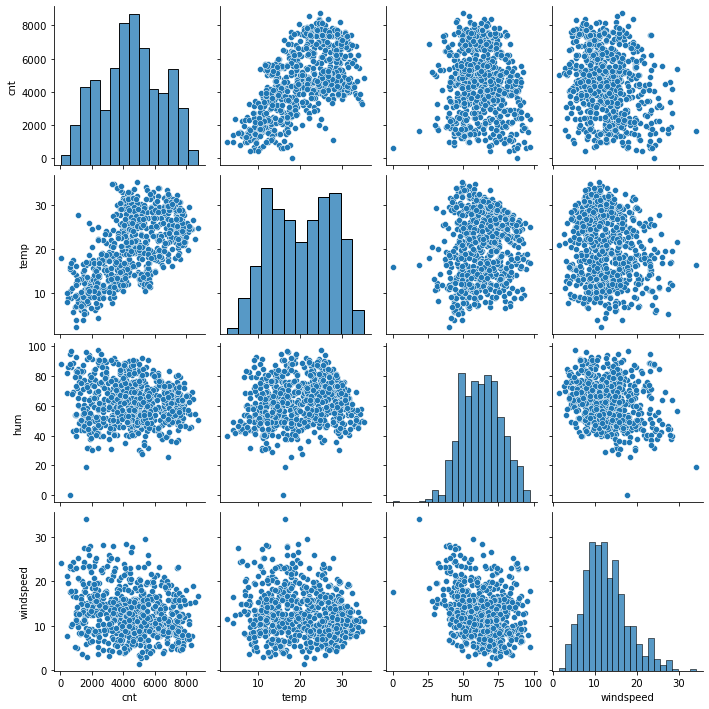

In [16]:
plt.figure(figsize = (12,24))
sns.pairplot(bike_sharing,vars=['cnt', 'temp','hum','windspeed'])
plt.show()

# Target variable 'cnt' & 'temp' variable are highly correlated.

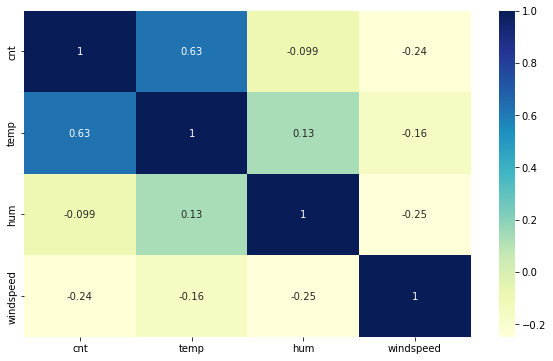

In [17]:
#Correlations for numeric variables

plt.figure(figsize=(10,6))
sns.heatmap(bike_sharing[['cnt', 'temp','hum','windspeed']].corr(), cmap="YlGnBu", annot = True)
plt.show()

# Target variable 'cnt' & 'temp' variable are highly correlated.

In [18]:
#### Visualising Categorical Variables

# Box plot of categorical variables.

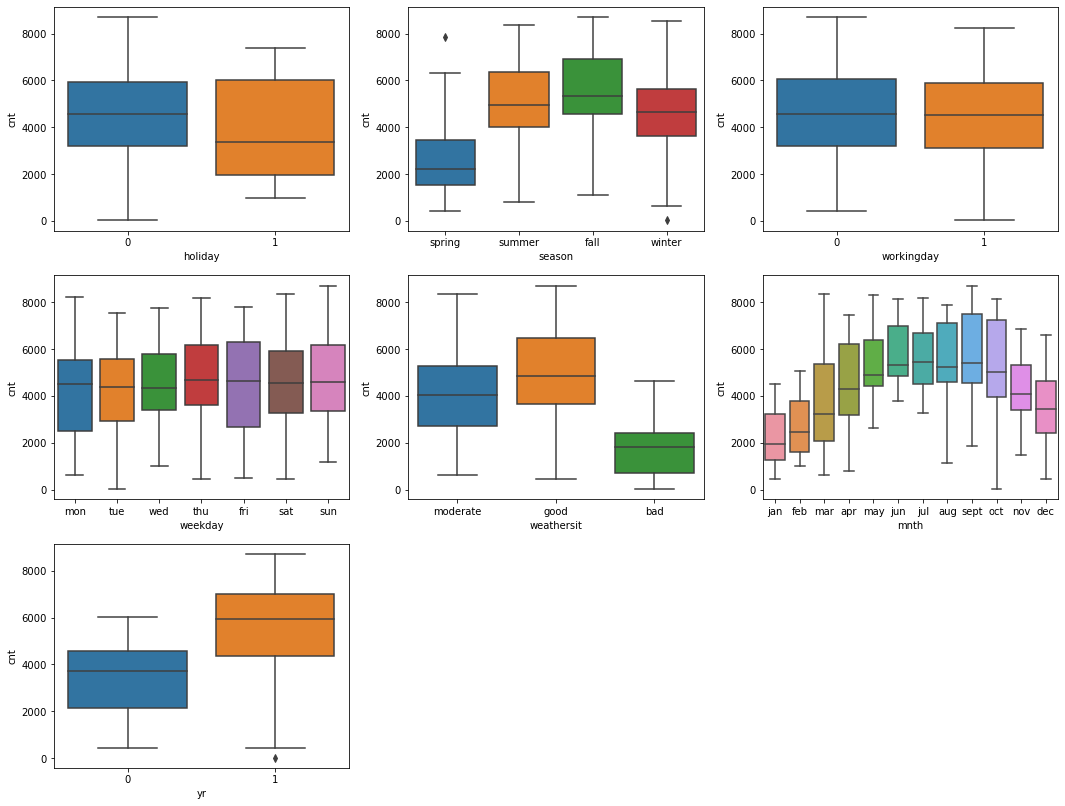

In [19]:
plt.figure(figsize=(18,14))
plt.subplot(3,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing);

plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing);

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing);

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing);

plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing);

plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing);

plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing);


In [20]:
# The following inferences can be drawn from the above plots:

#1. 'Fall' season has highest demand for rental bikes.
#2. 'Friday' followed by 'Thursday' has the highest demand.
#3. 1:'good' - Clear, Few clouds, Partly cloudy, Partly cloudy weather situation has the highest demand for rental bikes.
#4. Continuous growth in demand of bikes until June.'sept' month has the highest demand for rental bikes.
#5. Demand has inccreased from 0:2018 to 1:2019 for rental bikes.

## Step 3: Data preparation

In [21]:
### Dummy Variables

In [22]:
# create the dummy variable for all the categorical variables and store it in a variable - 'dummy_var'

In [23]:
var_season = pd.get_dummies(bike_sharing["season"],drop_first=True)
var_mnth = pd.get_dummies(bike_sharing["mnth"],drop_first=True)
var_weekday = pd.get_dummies(bike_sharing["weekday"],drop_first=True)
var_weathersit = pd.get_dummies(bike_sharing["weathersit"],drop_first=True)

In [24]:
var_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
var_mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [26]:
var_weekday.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [27]:
var_weathersit.head()

,good,moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [28]:
# Add the results to the original housing dataframe

bike_sharing = pd.concat([bike_sharing, var_season,var_mnth,var_weekday,var_weathersit], axis = 1)

In [29]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,1,0
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,1,0
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# Drop '"season","mnth","weekday",'weathersit' as we have created the dummies for it
bike_sharing.drop(["season","mnth","weekday",'weathersit'], axis = 1, inplace = True)

bike_sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 4: Splitting the Data into Training and Testing Sets

#As you know, the first basic step for regression is performing a train-test split.

In [31]:
bike_sharing.shape

(730, 29)

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
### Rescaling the Features 

#We will use MinMax scaling.

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## Step 5: Model Building

In [36]:
#Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
## Building our model

#### RFE
#Recursive feature elimination

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 14
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('good', True, 1),
 ('moderate', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jan', 'jul', 'nov', 'sept', 'good', 'moderate'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [44]:
##Building model using statsmodel, for the detailed statistics

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.25e-189
Time:                        18:02:44   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0613      0.047      1.294      0.1

In [49]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,141.54
13,good,10.21
14,moderate,8.86
6,spring,5.20
3,temp,3.97
8,winter,3.77
7,summer,2.67
4,hum,1.91
9,jan,1.57
10,jul,1.49


In [50]:
# Dropping the variable 'nov' as it has high P value

In [51]:
X_train_new = X_train_rfe.drop(["nov"], axis = 1)

In [52]:
# Rebuilding the model without 'nov'

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [54]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [55]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          4.45e-190
Time:                        18:02:44   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0552      0.047      1.168      0.2

In [56]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,140.45
12,good,10.20
13,moderate,8.85
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,hum,1.91
9,jan,1.57
10,jul,1.49


In [57]:
# Dropping the variable 'jan' as it has high P value
X_new = X.drop('jan', 1)

In [58]:
# Build a new model
X_train_lm = sm.add_constant(X_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.69e-190
Time:                        18:02:44   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0459      0.047      0.974      0.3

In [60]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,138.91
11,good,10.17
12,moderate,8.83
6,spring,5.02
3,temp,3.61
8,winter,3.49
7,summer,2.61
4,hum,1.90
9,jul,1.48
10,sept,1.30


In [61]:
X_t = X_new.drop(['good'], axis=1) # Dropping the variable 'good' as it has high VIF value (>5.00)

In [62]:
# Build a new model
X_train_lm = sm.add_constant(X_t)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.57e-175
Time:                        18:02:44   Log-Likelihood:                 470.70
No. Observations:                 510   AIC:                            -917.4
Df Residuals:                     498   BIC:                            -866.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3416      0.037      9.354      0.0

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_t
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.85
6,spring,4.99
3,temp,3.55
8,winter,3.49
7,summer,2.61
4,hum,1.60
9,jul,1.48
11,moderate,1.40
10,sept,1.30
5,windspeed,1.14


In [65]:
X_c = X_t.drop(['spring'], axis=1) # Dropping the variable 'spring' as it has high P value

In [66]:
# Build a new model
X_train_lm = sm.add_constant(X_c)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     219.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.02e-175
Time:                        18:02:44   Log-Likelihood:                 468.85
No. Observations:                 510   AIC:                            -915.7
Df Residuals:                     499   BIC:                            -869.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2961      0.028     10.699      0.0

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_c
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_c.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.04
4,hum,1.59
3,temp,1.58
8,jul,1.43
10,moderate,1.39
6,summer,1.33
7,winter,1.28
9,sept,1.19
5,windspeed,1.13
1,yr,1.03


In [69]:
X_r = ['yr', 'holiday', 'temp', 'hum', 'windspeed','summer','winter', 'jul', 'sept', 'moderate']
X_r

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'summer',
 'winter',
 'jul',
 'sept',
 'moderate']

## Step 6: Residual analysis

In [70]:
## Residual Analysis of the train data

##So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), 
#let us plot the histogram of the error terms and see what it looks like.

In [71]:
y_train_price = lr_4.predict(X_train_lm)

In [72]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

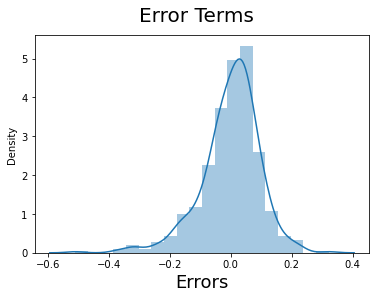

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7 - Making Predictions

In [74]:
#Applying the scaling on the test sets

In [75]:
num_vars = ['temp', 'hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_m4 dataframe by dropping variables from X_test
X_test_m4 = X_test[X_r]

# Adding a constant variable 
X_test_m4 = sm.add_constant(X_test_m4)

In [78]:
# Making predictions
y_pred = lr_4.predict(X_test_m4)

# Step 8 - Model Evaluation

Text(0, 0.5, 'y_pred')

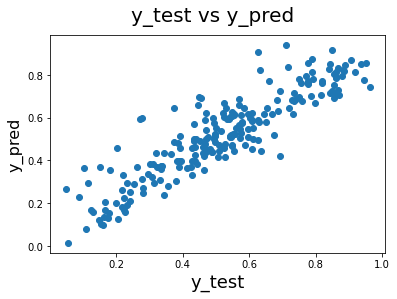

In [80]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [81]:
#The equation of our best fitted line is:

# cnt= 0.29 + (0.23 x yr) - (0.08 × holiday) + (0.62 x temp) - (0.32 x hum) - (0.23 x windspeed) + (0.08 x summer) + (0.13 X winter) - (0.05 X jul) + (0.09 x sept) - (0.02 x moderate)

In [82]:
# R^2 Value for TEST

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8027892250001358

## Interpretation of Coefficients:

In [84]:
#1. yr: A coefficient value of ‘0.23’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.23 units.

#2. holiday: A coefficient value of ‘-0.08’ indicates a unit increase in holiday variable, decreases the bike hire numbers by 0.08 units.

#3. temp: A coefficient value of ‘0.62’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.62 units.

#4. hum: A coefficient value of ‘-0.32’ indicates that a unit increase in temp variable, decreases the bike hire numbers by 0.32 units.

#5. windspeed : A coefficient value of ‘-0.23’ indicates that a unit increase in temp variable, decreases the bike hire numbers by 0.23 units.

#6. 2 :summer: A coefficient value of ‘0.08’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.08 units.

#7. 4:winter: A coefficient value of ‘0.13’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.13 units.

#8. jul: A coefficient value of ‘-0.05’ indicates that a unit increase in temp variable, decreases the bike hire numbers by 0.05 units.

#9. sept: A coefficient value of ‘0.09’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.09 units.

#10. moderate: A coefficient value of ‘-0.02’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.02 units.

### Top features contributing significantly towards explaining the demand of the shared bikes :

In [85]:
# Positive impact

# 1. Month of 'September'

# 2. 'Summer' season

# 3. 'Winter' season

# 4. 'moderate' weather situation

# 5. 'Temp' - temperature in celsius

# The above variables can be considered by the company to come up with a business plan to increase the numbers of rental of bikes.

# Negative impact

# 1. 'holiday','hum', 'jul','windspeed' variables have a negative impact and will result in decrease in rental of bikes.

